Import

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Init

In [63]:
image_dir = "img"
image_name = "bacteria_dark.jpg"
image_name = f"{image_dir}/{image_name}"

Load image

[[28 29 32 ... 42 43 44]
 [28 25 35 ... 46 46 46]
 [30 22 32 ... 45 44 44]
 ...
 [34 34 30 ... 40 40 37]
 [34 40 26 ... 38 40 43]
 [33 32 34 ... 36 38 46]]


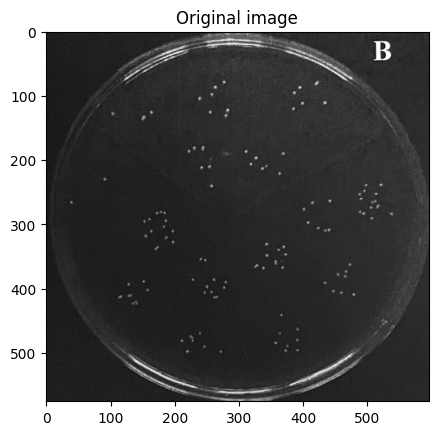

In [64]:
image = cv2.imread(image_name, 0)
rgb_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

print(image)

plt.imshow(image, cmap="gray")
plt.title("Original image")
plt.show()

Histogram equalisation

[[ 19  27  56 ... 151 160 169]
 [ 19   6  88 ... 185 185 185]
 [ 36   1  56 ... 177 169 169]
 ...
 [ 77  77  36 ... 134 134 107]
 [ 77 134   9 ... 117 134 160]
 [ 67  56  77 ...  98 117 185]]


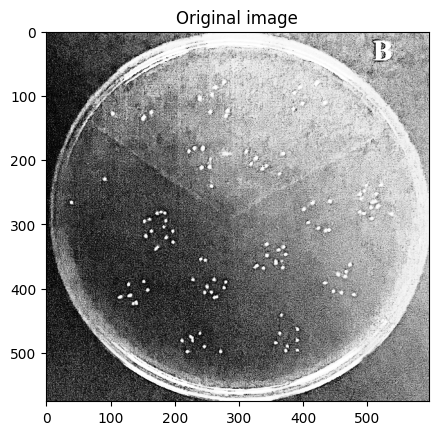

In [65]:
image = cv2.equalizeHist(image)

print(image)

plt.imshow(image, cmap="gray")
plt.title("Original image")
plt.show()

Binary thresholding

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


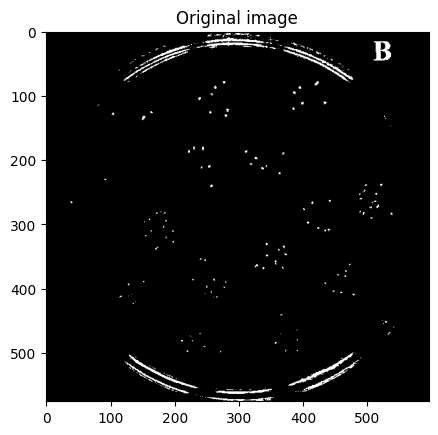

In [66]:
ret, image = cv2.threshold(image, 250, 255, cv2.THRESH_BINARY)

print(image)

plt.imshow(image, cmap="gray")
plt.title("Original image")
plt.show()

Define erosion / dilation kernel

In [67]:
kernel = np.ones((3,3), np.uint8)

print(kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


Apply erosion

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


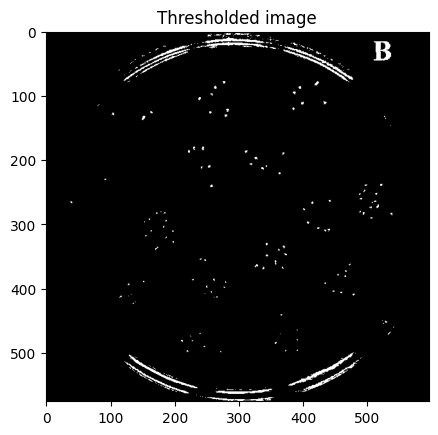

In [68]:
thresh = cv2.erode(image, kernel, iterations=0)

print(thresh)

plt.imshow(thresh, cmap="gray")
plt.title("Thresholded image")
plt.show()

Apply dilation

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


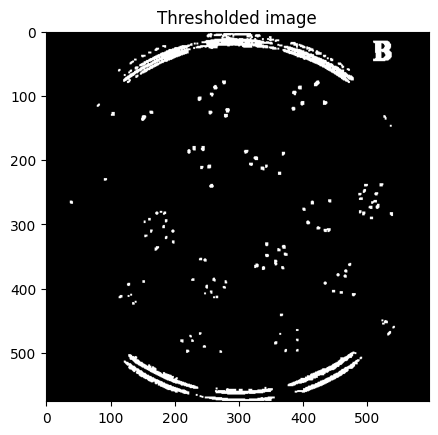

In [69]:
thresh = cv2.dilate(image, kernel, iterations=1)

print(thresh)

plt.imshow(thresh, cmap="gray")
plt.title("Thresholded image")
plt.show()

Find the circles

In [70]:
circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=0.9, minRadius=1, maxRadius=3)

print(circles)

[[[465.00003   381.          2.3200002]
  [433.80002   391.80002     2.2      ]
  [ 39.        265.80002     2.3200002]
  [172.20001   282.6         2.3200002]
  [367.80002   367.80002     2.3200002]
  [241.8       211.8         2.3200002]
  [361.80002   340.2         2.3200002]
  [443.40002    43.800003    2.3200002]
  [127.8       394.2         2.2      ]
  [246.6       355.80002     2.2      ]
  [115.8       412.2         2.3200002]
  [150.6        37.800003    2.3200002]
  [210.6       481.80002     2.3200002]
  [229.8       183.          2.3200002]
  [342.6       330.6         2.3200002]
  [537.        283.80002     2.3200002]
  [ 91.8       229.8         2.2      ]
  [186.6       321.          2.2      ]
  [279.        389.40002     2.2      ]
  [469.80002    59.4         2.2      ]
  [459.00003   406.2         2.08     ]
  [384.6       120.600006    2.3200002]
  [495.00003   247.8         2.3200002]
  [504.6       274.2         2.3200002]
  [528.60004   451.80002     2.3200002]


Count and draw circles

115


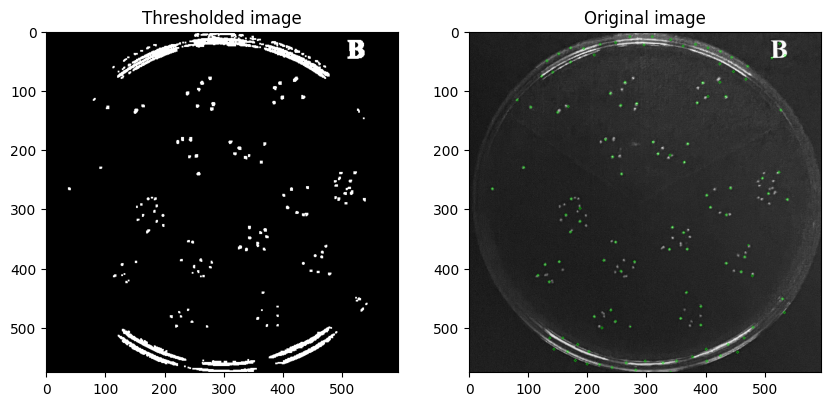

In [71]:
count = 0

if circles is not None:
  circles = np.round(circles[0, :]).astype("int")

  for (x,y,r) in circles:
    if r <= 8 / 3.14:
      cv2.circle(rgb_image, (x,y), r, (0,255,0), 1)
      count += 1

print(count)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(thresh, cmap="gray")
plt.title("Thresholded image")

plt.subplot(1,2,2)
plt.imshow(rgb_image)
plt.title("Original image")

plt.show()